In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds = xr.open_dataset('E://faks//cda//cmip6//ham_hist_interpo.nc')

In [3]:
#interpolate
#choose months
#calculate hours for one year
#calculate for every year

In [4]:
#if temp <1.4 hours=hours*0
#if temp >1.5 and <4 hours=hours*0.5
# 2.5 - 9.1 hours=hours*1
# 9.2 - 12.4 hours=hours*0.5
# 12.5 - 15.9 hours=hours*0
# 16 - 18 hours=hours*(-0.5)
# >18 hours=hours*(-1)

In [5]:
ds = ds.drop_vars(['lat', 'lon','height'])

In [6]:
data = ds.sel(time=ds.time.dt.month.isin([1, 2, 3, 12]))

In [7]:
#conditions
temp=data.tas
hours=data.time.dt.hour
temp=temp - 273.15
temp1=xr.where((temp>= 1.5) & (temp <= 2.4), 0.5 , np.nan)
temp2=xr.where((temp>= 2.5) & (temp <= 9.1), 1, np.nan)
temp3=xr.where((temp>= 9.2) & (temp <= 12.4), 0.5 , np.nan)
temp4=xr.where((temp>= 12.5) & (temp <= 15.9), 0 , np.nan)
temp5=xr.where((temp>= 16) & (temp <= 18), (-0.5) , np.nan)
temp6=xr.where((temp>= 18), -1 , np.nan)
hours = temp1 + temp2 + temp3 + temp4 + temp5 + temp6

In [8]:
yearsum1 = temp1.groupby('time.year').sum(dim='time')
yearsum2 = temp2.groupby('time.year').sum(dim='time')
yearsum3 = temp3.groupby('time.year').sum(dim='time')
yearsum4 = temp4.groupby('time.year').sum(dim='time')
yearsum5 = temp5.groupby('time.year').sum(dim='time')
yearsum6 = temp6.groupby('time.year').sum(dim='time')

In [9]:
yearsum = yearsum1 + yearsum2 + yearsum3 + yearsum4 + yearsum5 + yearsum6

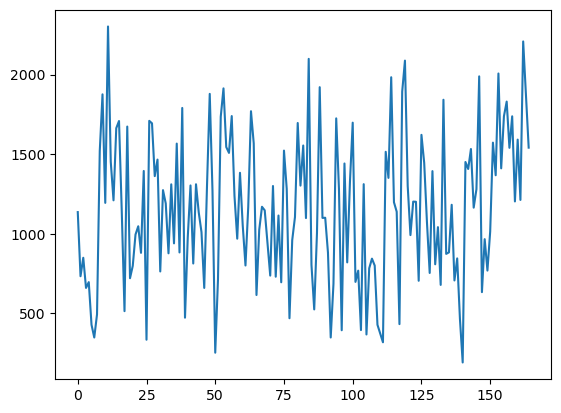

In [10]:
plt.plot(yearsum)

In [11]:
#chill hour model
chill_hours = xr.where((temp>= 0) & (temp <= 7.2), 1 , np.nan)    #returns the variable 'chill_hours' with boolean values
chill_hours

<xarray.DataArray 'tas' (time: 480120)>
array([ 1.,  1.,  1., ..., nan, nan, nan])
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01T00:30:00 ... 2014-12-31T23:30:00

In [12]:
chill_hours_year = chill_hours.groupby('time.year').sum(dim='time')

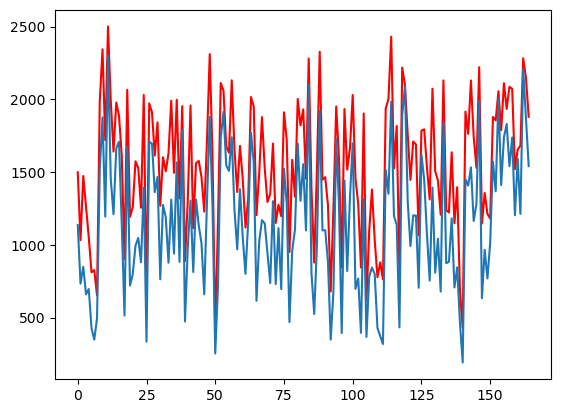

In [13]:
#comparison between apple models
plt.plot(chill_hours_year, color='red') #chill hour model
plt.plot(yearsum) #utah

In [176]:
temp.max()

<xarray.DataArray 'tas' ()>
array(13.937592, dtype=float32)